In [48]:
import numpy as np
import data_reader as dr
import matplotlib.pyplot as plt
import toolkit as tk
from scipy.optimize import fsolve

%matplotlib inline

In [49]:
a5 = dr.sample(r"C:\Users\Scott Reid\Documents\Masters\Research\Data\TbTe3_A5")

In [66]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [50]:
d, nam = a5.get_dat(1)
print(nam)

A-B_TbTe3_roomT_test_2018-01-26_13-23-22.dat


In [75]:
r = d['VX']/d['IA']
rr = r[0:26000]
x = np.arange(0,26000)
delta_t = 2924.3
t = delta_t*x/26000
B = 30*t-41500

In [76]:
p0 = np.polyfit(B, rr, 2)

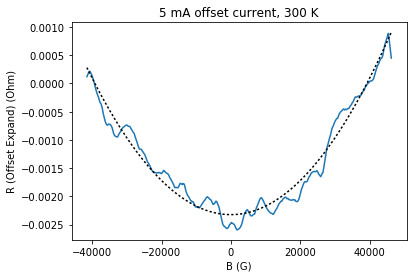

In [77]:
plt.plot(B,smooth(rr, 500))
plt.plot(B, p0[0]*B*B  + p0[2], 'k:')
plt.xlabel('B (G)')
plt.ylabel('R (Offset Expand) (Ohm)')
plt.title('5 mA offset current, 300 K')

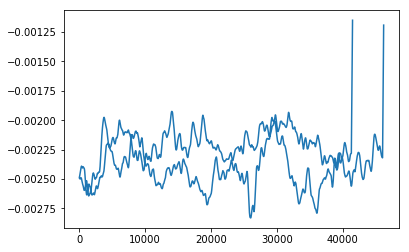

In [78]:
plt.plot(np.abs(B), smooth(rr-p0[0]*B*B,100))

In [7]:
p0

array([  1.51261093e-12,  -1.91330182e-09,  -2.32401195e-03])

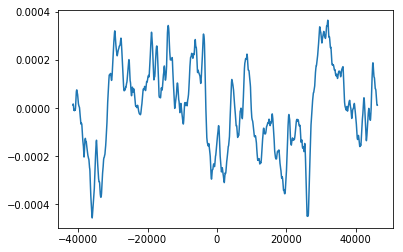

In [92]:
corrected = rr - B*B*p0[0] - B*p0[1] - p0[2]
plt.plot(B, smooth(corrected, 200))

In [80]:
def plotft(x,y, plot = True):
    ft = np.fft.fft(y)
    freq = np.fft.fftfreq(x.shape[-1])
    L = len(freq)
    freq = freq[0:int(L/2)]
    ft = np.abs(ft[0:int(L/2)])
    if (plot):
        plt.plot(freq, ft)
        plt.yscale('log')
    return freq, ft

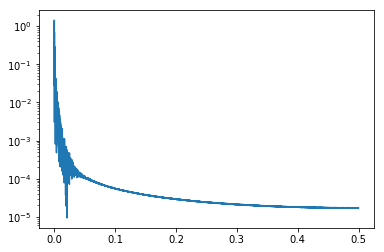

In [106]:
freq, ff = plotft(B,smooth(corrected, 500), True)

(0, 1000)

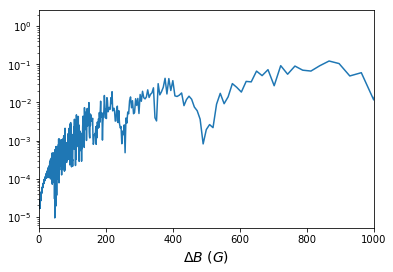

In [107]:
plt.plot(1/freq[1:], ff[1:], '-')
# plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'${\Delta B}$ ($G$)', fontsize = 14)
plt.xlim([0,1000])

In [14]:
freq[np.argmax(ff[1:])+1]*10000

2.6923076923076921

In [15]:
bs = 1/freq[1:][np.argsort(ff[1:])][::-1]

In [24]:
d, _ = a5.get_dat(2)

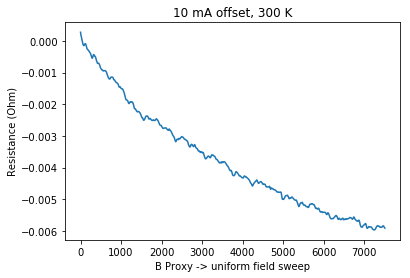

In [30]:
plt.plot(d['VX']/d['IA'])
x = np.arange(0, len(d['VX']))
corrected = d['VX']/d['IA']
po = np.polyfit(x, corrected, 2)
corrected = corrected - po[0]*x*x - po[1]*x - po[0]
plt.xlabel('B Proxy -> uniform field sweep')
plt.ylabel('Resistance (Ohm)')
plt.title('10 mA offset, 300 K')

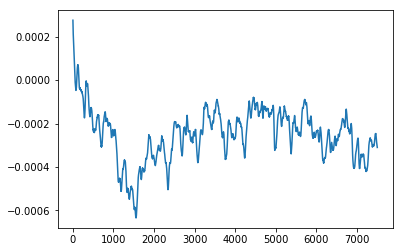

In [31]:
plt.plot(x, corrected)

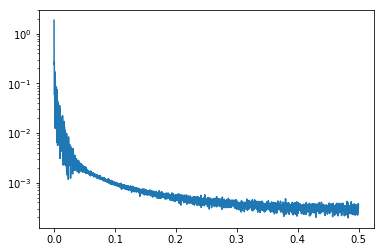

In [32]:
f, ff = plotft(x, corrected)

In [266]:
d, n = a5.get_dat(3)
print(n)

A-B_TbTe3_roomT_test_2018-01-26_14-53-32.dat


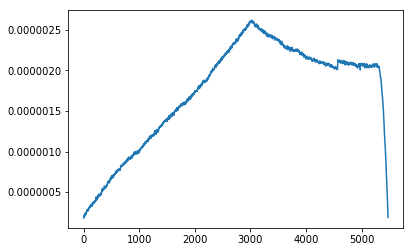

In [258]:
plt.plot(d['VX'])

In [34]:
d, n = a5.get_dat(0)

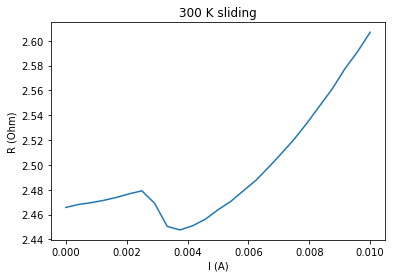

In [35]:
r = d['VX']/d['IA']
i = d['IO']

ro = r[0]
To = 300

plt.plot(i, r)
plt.title('300 K sliding')
plt.xlabel('I (A)')
plt.ylabel("R (Ohm)")

In [369]:
#eyeballing it, resistance drop:
dr = 0.04

In [370]:
p1 = np.polyfit(i[:7], r[:7], 2)
b = p1[0]
p2 = np.polyfit(i[11:], r[11:], 2)
b2 = p2[0]

In [371]:
alpha = ro*ro/To/b
print(alpha)

rs = b2*alpha/((ro-dr)**2)
print(rs)
print(ro/To)

3.62258757292e-05
0.0142808131655
0.00821913333333


In [372]:
dr/(rs - ro/To)+To

306.59883086992807

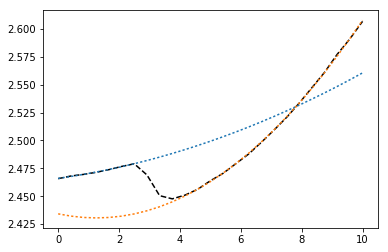

In [322]:
plt.plot(i*1e3, r, 'k--')
plt.plot(i*1e3, p1[0]*i*i + p1[1]*i + p1[2], ':')
plt.plot(i*1e3, p2[0]*i*i + p2[1]*i + p2[2], ':')
plt.xlabel('')

In [265]:
print(n)

A-B_TbTe3_roomT_test_2018-01-26_12-44-43.dat


In [329]:
2.5/300

0.008333333333333333

In [330]:
10*10*8.3*1e-9

8.300000000000002e-07

In [36]:
d, n = a5.get_dat(5)
print(n)

A-B_TbTe3_roomT_test_2018-01-26_15-43-20.dat


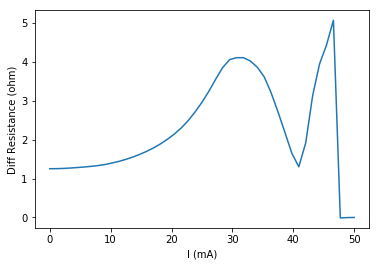

In [43]:
plt.plot(d['IO']*1e3, d['VX']/d['IA'])
plt.xlabel('I (mA)')
plt.ylabel('Diff Resistance (ohm)')